# Image processing for NGC 309: Part1

In [1]:
import numpy as np
import math
from astropy.io import fits
import os, sys
import matplotlib.pyplot as plt

global PIXEDFIT_HOME
PIXEDFIT_HOME = os.environ['PIXEDFIT_HOME']
sys.path.insert(0, PIXEDFIT_HOME+'/src')

### Call a class image_processing from piXedfit_images module

In [ ]:
from piXedfit_images import images_processing

### Prepare input for the image_processing class

In [4]:
### A set of photometric filters: 
filters = ['galex_fuv', 'galex_nuv', 'sdss_u', 'sdss_g', 'sdss_r', 'sdss_i', 'sdss_z', '2mass_j', '2mass_h', 
           '2mass_k', 'wise_w1', 'wise_w2']
nbands = len(filters)

### A list of science images:   
sci_img = {}
sci_img['galex_fuv'] = 'GI1_009100_NGC0309-fd-intbgsub.fits'
sci_img['galex_nuv'] = 'GI1_009100_NGC0309-nd-intbgsub.fits'
sci_img['sdss_u'] = 'frame-u-001740-3-0115.fits'
sci_img['sdss_g'] = 'frame-g-001740-3-0115.fits'
sci_img['sdss_r'] = 'frame-r-001740-3-0115.fits'
sci_img['sdss_i'] = 'frame-i-001740-3-0115.fits'
sci_img['sdss_z'] = 'frame-z-001740-3-0115.fits'
sci_img['2mass_j'] = 'aJ_asky_001022s0620186.fits'
sci_img['2mass_h'] = 'aH_asky_001022s0620186.fits'
sci_img['2mass_k'] = 'aK_asky_001022s0620186.fits'
sci_img['wise_w1'] = 'skybgsub_0138m107_ac51-w1-int-3_ra14.177750000000001_dec-9.913861111111112_asec800.000.fits'
sci_img['wise_w2'] = 'skybgsub_0138m107_ac51-w2-int-3_ra14.177750000000001_dec-9.913861111111112_asec800.000.fits'

### A list of variance images:
var_img = {}
var_img['galex_fuv'] = 'var_GI1_009100_NGC0309-fd-intbgsub.fits' 
var_img['galex_nuv'] = 'var_GI1_009100_NGC0309-nd-intbgsub.fits'
var_img['sdss_u'] = 'var_frame-u-001740-3-0115.fits'
var_img['sdss_g'] = 'var_frame-g-001740-3-0115.fits'
var_img['sdss_r'] = 'var_frame-r-001740-3-0115.fits'
var_img['sdss_i'] = 'var_frame-i-001740-3-0115.fits'
var_img['sdss_z'] = 'var_frame-z-001740-3-0115.fits'
var_img['2mass_j'] = 'var_aJ_asky_001022s0620186.fits'
var_img['2mass_h'] = 'var_aH_asky_001022s0620186.fits'
var_img['2mass_k'] = 'var_aK_asky_001022s0620186.fits'
var_img['wise_w1'] = 'var_0138m107_ac51-w1-unc-3_ra14.177750000000001_dec-9.913861111111112_asec800.000.fits'
var_img['wise_w2'] = 'var_0138m107_ac51-w2-unc-3_ra14.177750000000001_dec-9.913861111111112_asec800.000.fits'

### A list of pixel sizes of the images:
img_pixsizes = {}
img_pixsizes['galex_fuv'] = 1.5
img_pixsizes['galex_nuv'] = 1.5
img_pixsizes['sdss_u'] = 0.396
img_pixsizes['sdss_g'] = 0.396
img_pixsizes['sdss_r'] = 0.396
img_pixsizes['sdss_i'] = 0.396
img_pixsizes['sdss_z'] = 0.396
img_pixsizes['2mass_j'] = 1.0
img_pixsizes['2mass_h'] = 1.0
img_pixsizes['2mass_k'] = 1.0
img_pixsizes['wise_w1'] = 1.37499998090796
img_pixsizes['wise_w2'] = 1.37499998090796

### Unit of pixel value: [0:flux, 1:surface brightness]
img_unit = {}
img_unit['galex_fuv'] = 0
img_unit['galex_nuv'] = 0
img_unit['sdss_u'] = 0
img_unit['sdss_g'] = 0
img_unit['sdss_r'] = 0
img_unit['sdss_i'] = 0
img_unit['sdss_z'] = 0
img_unit['2mass_j'] = 0
img_unit['2mass_h'] = 0
img_unit['2mass_k'] = 0
img_unit['wise_w1'] = 0
img_unit['wise_w2'] = 0

### List of kernels FITS files in case the user want to use their own kernels
### 'None' input means the PSF matching will use convolution kernels from piXedfit    
kernels = {}
kernels['galex_fuv'] = None
kernels['galex_nuv'] = None
kernels['sdss_u'] = None
kernels['sdss_g'] = None
kernels['sdss_r'] = None
kernels['sdss_i'] = None
kernels['sdss_z'] = None
kernels['2mass_j'] = None
kernels['2mass_h'] = None
kernels['2mass_k'] = None
kernels['wise_w1'] = None
kernels['wise_w1'] = None

### Coordinate of the target galaxy:
gal_ra = 14.177751925               
gal_dec = -9.913864294
gal_z = 0.0188977

### dimension of the final stamp images product: 
stamp_size = [131,131]

### path to sewpy code (a Python wrapper for SExtractor):
sewpypath = "/data/softwares/megalut-sewpy-67e36b7/"

### Input to the image_processing class

In [5]:
redc_images = images_processing(filters=filters,sci_img=sci_img,var_img=var_img,
                                img_pixsizes=img_pixsizes,img_unit=img_unit,kernels=kernels,
                                gal_ra=gal_ra,gal_dec=gal_dec,stamp_size=stamp_size,
                               sewpypath=sewpypath)

### Run image processing

In [6]:
output_stamps = redc_images.reduced_stamps()

[Construct sky-background of an SDSS image: frame-u-001740-3-0115.fits]
produce skybg_frame-u-001740-3-0115.fits
[Construct variance/sigma-square image of an SDSS image: frame-u-001740-3-0115.fits]
produce sigmasq_frame-u-001740-3-0115.fits
[Construct sky-background of an SDSS image: frame-g-001740-3-0115.fits]
produce skybg_frame-g-001740-3-0115.fits
[Construct variance/sigma-square image of an SDSS image: frame-g-001740-3-0115.fits]
produce sigmasq_frame-g-001740-3-0115.fits
[Construct sky-background of an SDSS image: frame-r-001740-3-0115.fits]
produce skybg_frame-r-001740-3-0115.fits
[Construct variance/sigma-square image of an SDSS image: frame-r-001740-3-0115.fits]
produce sigmasq_frame-r-001740-3-0115.fits
[Construct sky-background of an SDSS image: frame-i-001740-3-0115.fits]
produce skybg_frame-i-001740-3-0115.fits
[Construct variance/sigma-square image of an SDSS image: frame-i-001740-3-0115.fits]
produce sigmasq_frame-i-001740-3-0115.fits
[Construct sky-background of an SDSS

/asiaa/home/abdurrouf/.local/lib/python3.7/site-packages/scipy/ndimage/interpolation.py:611: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


[resize kernel_galex_fuv_to_wise_w2.fits.gz to match the sampling of galex_fuv: 1.500000 arcsec/pixel] => dimension: (608 x 608)
brightest pixel: (304,303)
desired new dimension: (607 x 607)
desired central position: (303,303)
[PSF matching]
[produce psfmatch_crop_GI1_009100_NGC0309-fd-intbgsub.fits]
[produce psfmatch_crop_GI1_009100_NGC0309-fd-skybg.fits]
[Cropping images around target galaxy to minimize PSF matching time]
[produce crop_GI1_009100_NGC0309-nd-intbgsub.fits]
[produce crop_GI1_009100_NGC0309-nd-skybg.fits]
[resize kernel_galex_nuv_to_wise_w2.fits.gz to match the sampling of galex_nuv: 1.500000 arcsec/pixel] => dimension: (608 x 608)
brightest pixel: (303,303)
desired new dimension: (607 x 607)
desired central position: (303,303)
[PSF matching]
[produce psfmatch_crop_GI1_009100_NGC0309-nd-intbgsub.fits]
[produce psfmatch_crop_GI1_009100_NGC0309-nd-skybg.fits]
[Cropping images around target galaxy to minimize PSF matching time]
[produce crop_frame-u-001740-3-0115.fits]
[pr

the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


[resize kernel_sdss_u_to_wise_w2.fits.gz to match the sampling of sdss_u: 0.396000 arcsec/pixel] => dimension: (2301 x 2301)
[PSF matching]
[produce psfmatch_crop_frame-u-001740-3-0115.fits]
[produce psfmatch_crop_skybg_frame-u-001740-3-0115.fits]
[produce psfmatch_crop_sigmasq_frame-u-001740-3-0115.fits]
[Cropping images around target galaxy to minimize PSF matching time]
[produce crop_frame-g-001740-3-0115.fits]
[produce crop_skybg_frame-g-001740-3-0115.fits]
[produce crop_sigmasq_frame-g-001740-3-0115.fits]
[resize kernel_sdss_g_to_wise_w2.fits.gz to match the sampling of sdss_g: 0.396000 arcsec/pixel] => dimension: (2301 x 2301)
[PSF matching]
[produce psfmatch_crop_frame-g-001740-3-0115.fits]
[produce psfmatch_crop_skybg_frame-g-001740-3-0115.fits]
[produce psfmatch_crop_sigmasq_frame-g-001740-3-0115.fits]
[Cropping images around target galaxy to minimize PSF matching time]
[produce crop_frame-r-001740-3-0115.fits]
[produce crop_skybg_frame-r-001740-3-0115.fits]
[produce crop_sigm

### See post-processed stamp images

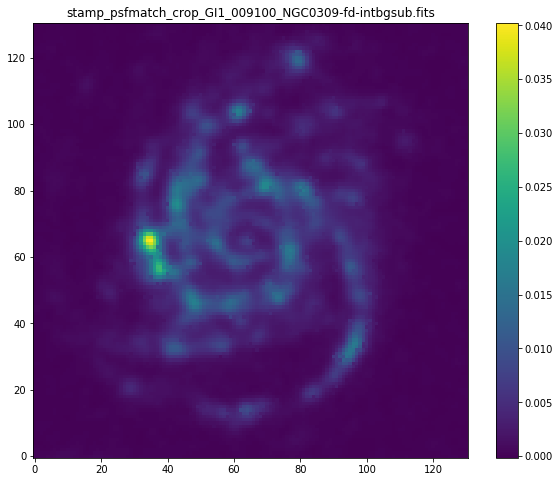

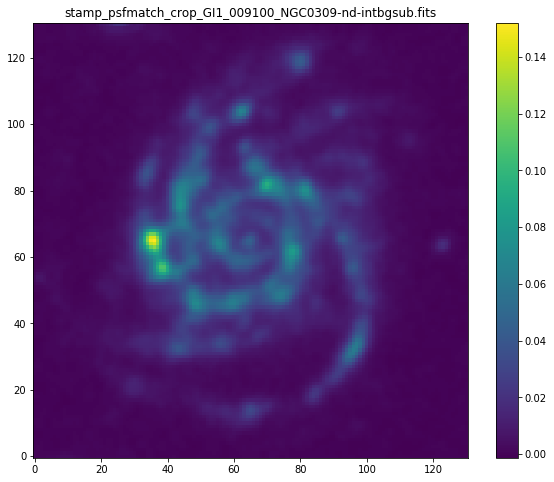

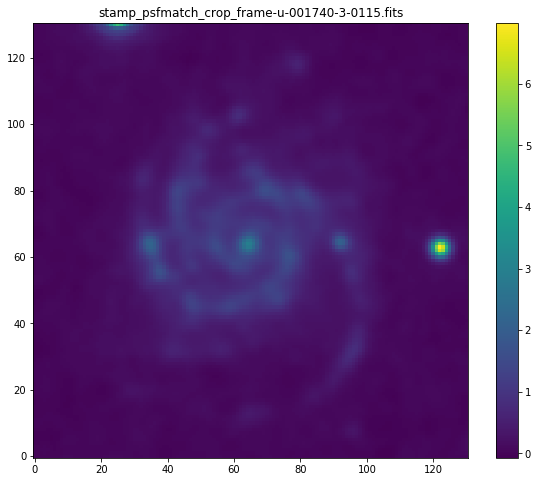

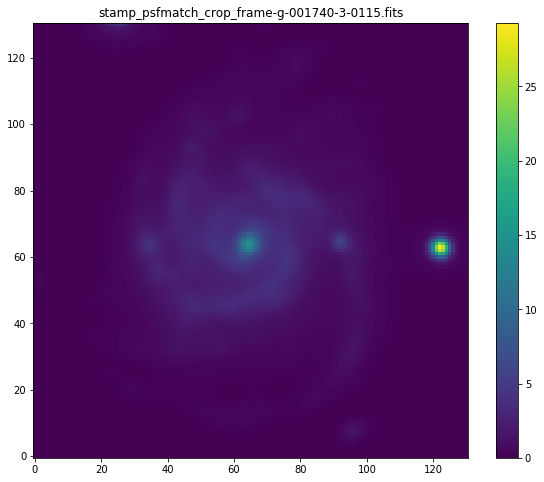

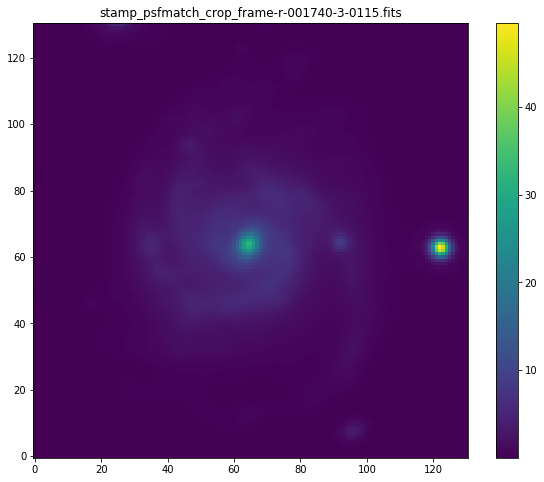

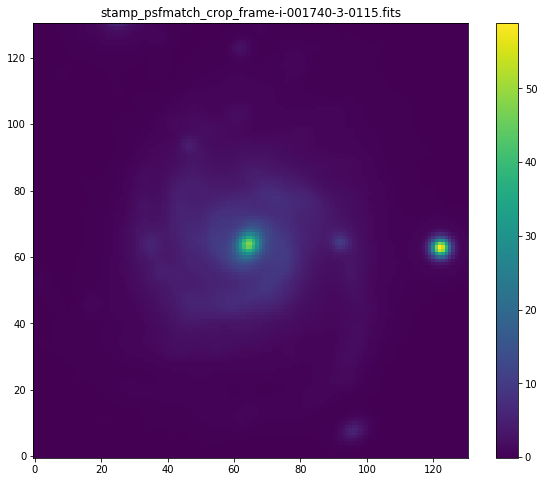

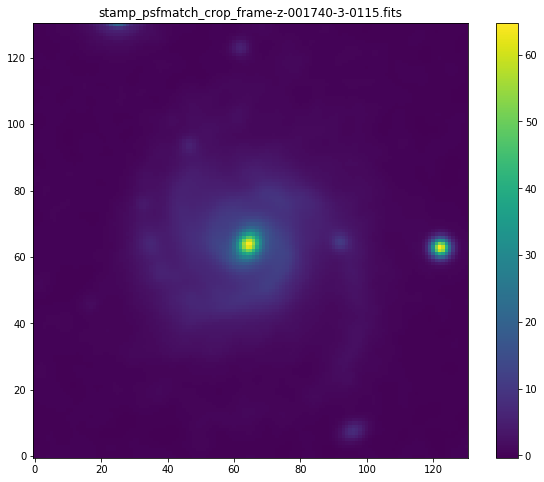

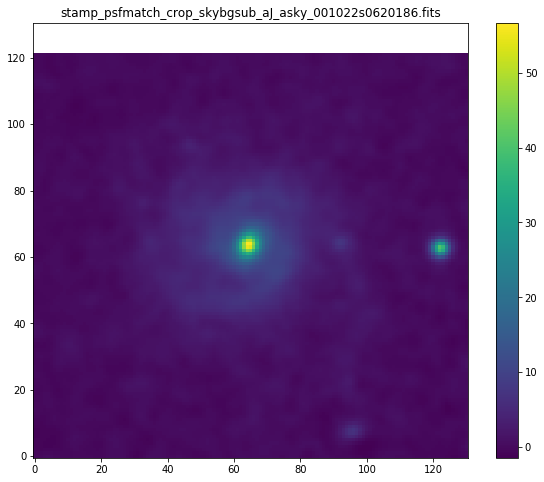

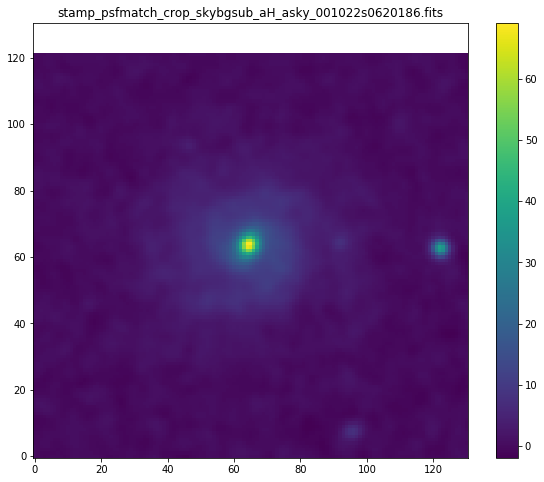

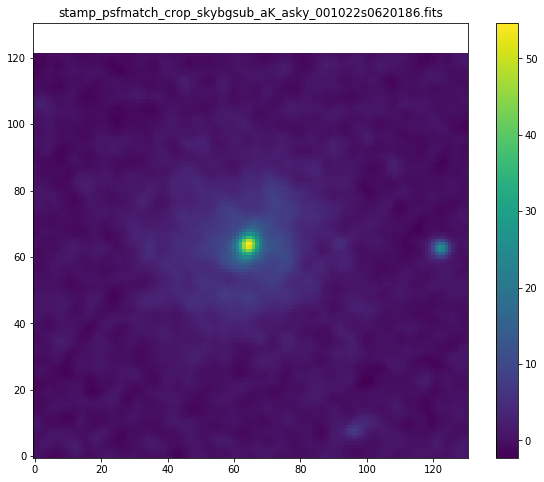

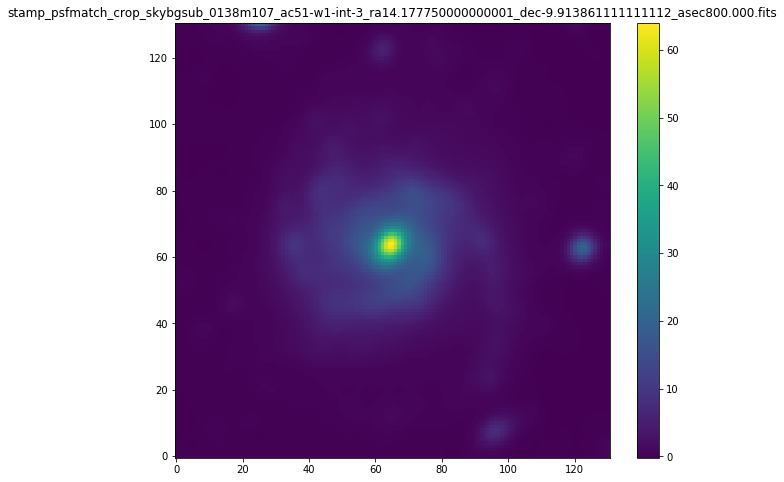

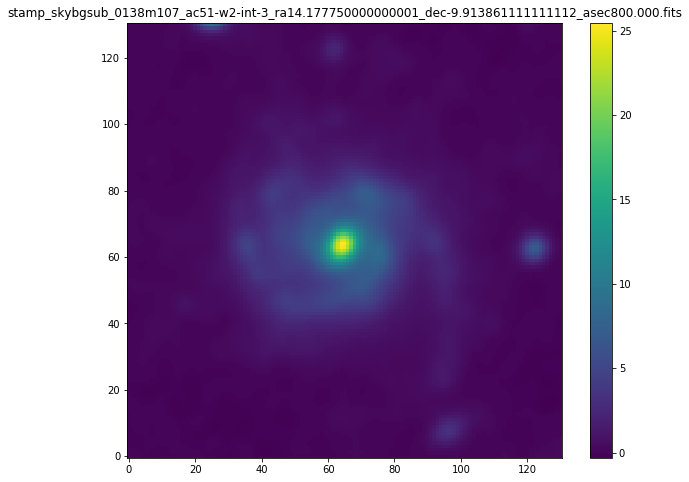

In [8]:
nbands = len(filters)
for bb in range(0,nbands):
    str_temp1 = "name_img_%s" % filters[int(bb)]
    hdu = fits.open(output_stamps[str_temp1])
    data_image = hdu[0].data
    hdu.close()
    
    fig1 = plt.figure(figsize=(10,8))
    f1 = plt.subplot()
    str_temp2 = "name_img_%s" % filters[int(bb)]
    plt.title("%s" % output_stamps[str_temp2])
    plt.imshow(data_image, origin='lower')
    plt.colorbar()

### Run SExtractor through segmentation_sectractor function to get segmentation maps

In [9]:
## segmentation with sextractor:
detect_thresh = 2.0
detect_minarea = 500
deblend_nthresh = 25
deblend_mincont = 1.0
sewpypath = "/data/softwares/megalut-sewpy-67e36b7/"
segm_map,segm_map_name = redc_images.segmentation_sextractor(output_stamps=output_stamps,
                                                              detect_thresh=detect_thresh,
                                                 detect_minarea=detect_minarea,deblend_nthresh=deblend_nthresh,
                                                 deblend_mincont=deblend_mincont,sewpypath=sewpypath)

INFO: sewpy.sewpy(__init__): SExtractor version is 2.8.6
INFO: sewpy.sewpy(__call__): Preparing to run SExtractor on stamp_psfmatch_crop_GI1_009100_NGC0309-fd-intbgsub.fits...
DEBUG: sewpy.sewpy(__call__): Using imgname 'stamp_psfmatch_crop_GI1_009100_NGC0309-fd-intbgsub'...
DEBUG: sewpy.sewpy(_write_default_config): Wrote /tmp/sewpy_workdir_35_8rhj1/config.txt
DEBUG: sewpy.sewpy(_write_params): Wrote /tmp/sewpy_workdir_35_8rhj1/params.txt
DEBUG: sewpy.sewpy(_write_default_conv): Wrote /tmp/sewpy_workdir_35_8rhj1/conv.txt
DEBUG: sewpy.sewpy(_write_default_psf): Wrote /tmp/sewpy_workdir_35_8rhj1/default.psf
INFO: sewpy.sewpy(__call__): Starting SExtractor now, with niceness None...
DEBUG: sewpy.sewpy(__call__): Running with command ['sex', 'stamp_psfmatch_crop_GI1_009100_NGC0309-fd-intbgsub.fits', '-c', '/tmp/sewpy_workdir_35_8rhj1/config.txt', '-DETECT_THRESH', '2.0', '-DETECT_MINAREA', '500', '-DEBLEND_NTHRESH', '25', '-DEBLEND_MINCONT', '1.0', '-CHECKIMAGE_TYPE', 'SEGMENTATION', '-CH

INFO: sewpy.sewpy(__call__): SExtractor stderr:
INFO: sewpy.sewpy(__call__): b'\x1b[1M> \n\x1b[1A----- SExtractor 2.8.6 started on 2020-07-08 at 15:31:12 with 12 threads\n\n\x1b[1M> Setting catalog parameters\n\x1b[1A\n> WARNING: Not enough apertures provided in config.:\n         some APER photometric values will remain blank \n\n\x1b[1M> Reading detection filter\n\x1b[1A\n> WARNING: Not enough apertures provided in config.:\n         some APER photometric values will remain blank \n\n\x1b[1M> Initializing check-image(s)\n\x1b[1A\x1b[1M> Initializing catalog\n\x1b[1A\x1b[1M> Looking for stamp_psfmatch_crop_frame-u-001740-3-0115.fits\n\x1b[1AMeasuring from: "GI1_009100_NGC0309_0"  / 131 x 131 / 0 bits FLOATING POINT data\nDetection+Measurement image: \x1b[1M> Setting up background maps\n\x1b[1A\x1b[1M> Filtering background map(s)\n\x1b[1A\x1b[1M> Computing background d-map\n\x1b[1A\x1b[1M> Computing background-noise d-map\n\x1b[1A(M+D) Background: 0.0490722  RMS: 0.0511687  / Threshold

INFO: sewpy.sewpy(__call__): Running SExtractor done, it took 0.03 seconds.
INFO: sewpy.sewpy(__call__): Read 1 objects from the SExtractor output catalog


SExtractor detection and segemnetation for stamp_psfmatch_crop_GI1_009100_NGC0309-fd-intbgsub.fits
X_IMAGE Y_IMAGE FLUX_APER   FLUX_APER_1  FLUX_APER_2 FLAGS
  pix     pix       ct           ct           ct          
------- ------- ---------- ------------- ----------- -----
  64.15  67.764 0.08484431 -4.584184e+33           0     8
SExtractor detection and segemnetation for stamp_psfmatch_crop_GI1_009100_NGC0309-nd-intbgsub.fits
X_IMAGE Y_IMAGE FLUX_APER  FLUX_APER_1  FLUX_APER_2 FLAGS
  pix     pix       ct          ct           ct          
------- ------- --------- ------------- ----------- -----
  64.69  67.457 0.5822606 -4.587987e+33           0     0
SExtractor detection and segemnetation for stamp_psfmatch_crop_frame-u-001740-3-0115.fits
X_IMAGE Y_IMAGE FLUX_APER  FLUX_APER_1  FLUX_APER_2 FLAGS
  pix     pix       ct          ct           ct          
------- ------- --------- ------------- ----------- -----
 64.427  65.962  42.88166 -4.826305e+33           0     0
SExtractor d

INFO: sewpy.sewpy(__init__): SExtractor version is 2.8.6
INFO: sewpy.sewpy(__call__): Preparing to run SExtractor on stamp_psfmatch_crop_frame-i-001740-3-0115.fits...
DEBUG: sewpy.sewpy(__call__): Using imgname 'stamp_psfmatch_crop_frame-i-001740-3-0115'...
DEBUG: sewpy.sewpy(_write_default_config): Wrote /tmp/sewpy_workdir__qus7pgz/config.txt
DEBUG: sewpy.sewpy(_write_params): Wrote /tmp/sewpy_workdir__qus7pgz/params.txt
DEBUG: sewpy.sewpy(_write_default_conv): Wrote /tmp/sewpy_workdir__qus7pgz/conv.txt
DEBUG: sewpy.sewpy(_write_default_psf): Wrote /tmp/sewpy_workdir__qus7pgz/default.psf
INFO: sewpy.sewpy(__call__): Starting SExtractor now, with niceness None...
DEBUG: sewpy.sewpy(__call__): Running with command ['sex', 'stamp_psfmatch_crop_frame-i-001740-3-0115.fits', '-c', '/tmp/sewpy_workdir__qus7pgz/config.txt', '-DETECT_THRESH', '2.0', '-DETECT_MINAREA', '500', '-DEBLEND_NTHRESH', '25', '-DEBLEND_MINCONT', '1.0', '-CHECKIMAGE_TYPE', 'SEGMENTATION', '-CHECKIMAGE_NAME', 'segm_sext_

INFO: sewpy.sewpy(__call__): SExtractor stderr:
INFO: sewpy.sewpy(__call__): b'\x1b[1M> \n\x1b[1A----- SExtractor 2.8.6 started on 2020-07-08 at 15:31:12 with 12 threads\n\n\x1b[1M> Setting catalog parameters\n\x1b[1A\n> WARNING: Not enough apertures provided in config.:\n         some APER photometric values will remain blank \n\n\x1b[1M> Reading detection filter\n\x1b[1A\n> WARNING: Not enough apertures provided in config.:\n         some APER photometric values will remain blank \n\n\x1b[1M> Initializing check-image(s)\n\x1b[1A\x1b[1M> Initializing catalog\n\x1b[1A\x1b[1M> Looking for stamp_psfmatch_crop_skybgsub_aJ_asky_001022s0620186.fits\n\x1b[1AMeasuring from: "GI1_009100_NGC0309_0"  / 131 x 131 / 0 bits FLOATING POINT data\nDetection+Measurement image: \x1b[1M> Setting up background maps\n\x1b[1A\x1b[1M> Filtering background map(s)\n\x1b[1A\x1b[1M> Computing background d-map\n\x1b[1A\x1b[1M> Computing background-noise d-map\n\x1b[1A(M+D) Background: 0.0258789  RMS: 0.483843   /

INFO: sewpy.sewpy(__call__): Running SExtractor done, it took 0.03 seconds.
INFO: sewpy.sewpy(__call__): Read 1 objects from the SExtractor output catalog
INFO: sewpy.sewpy(__init__): SExtractor version is 2.8.6
INFO: sewpy.sewpy(__call__): Preparing to run SExtractor on stamp_psfmatch_crop_skybgsub_0138m107_ac51-w1-int-3_ra14.177750000000001_dec-9.913861111111112_asec800.000.fits...
DEBUG: sewpy.sewpy(__call__): Using imgname 'stamp_psfmatch_crop_skybgsub_0138m107_ac51-w1-int-3_ra14.177750000000001_dec-9.913861111111112_asec800.000'...
DEBUG: sewpy.sewpy(_write_default_config): Wrote /tmp/sewpy_workdir_k4agermi/config.txt
DEBUG: sewpy.sewpy(_write_params): Wrote /tmp/sewpy_workdir_k4agermi/params.txt
DEBUG: sewpy.sewpy(_write_default_conv): Wrote /tmp/sewpy_workdir_k4agermi/conv.txt
DEBUG: sewpy.sewpy(_write_default_psf): Wrote /tmp/sewpy_workdir_k4agermi/default.psf
INFO: sewpy.sewpy(__call__): Starting SExtractor now, with niceness None...
DEBUG: sewpy.sewpy(__call__): Running with 

SExtractor detection and segemnetation for stamp_psfmatch_crop_frame-i-001740-3-0115.fits
X_IMAGE Y_IMAGE FLUX_APER  FLUX_APER_1  FLUX_APER_2 FLAGS
  pix     pix       ct          ct           ct          
------- ------- --------- ------------- ----------- -----
 69.097  65.466  433.0865 -4.806022e+33           0     8
SExtractor detection and segemnetation for stamp_psfmatch_crop_frame-z-001740-3-0115.fits
X_IMAGE Y_IMAGE FLUX_APER  FLUX_APER_1  FLUX_APER_2 FLAGS
  pix     pix       ct          ct           ct          
------- ------- --------- ------------- ----------- -----
 69.054  64.763  590.0024 -4.870673e+33           0     8
SExtractor detection and segemnetation for stamp_psfmatch_crop_skybgsub_aJ_asky_001022s0620186.fits
X_IMAGE Y_IMAGE FLUX_APER  FLUX_APER_1  FLUX_APER_2 FLAGS
  pix     pix       ct          ct           ct          
------- ------- --------- ------------- ----------- -----
 64.426  64.518  837.9412 -4.694469e+33           0     0
SExtractor detection and

INFO: sewpy.sewpy(__call__): SExtractor stderr:
INFO: sewpy.sewpy(__call__): b'\x1b[1M> \n\x1b[1A----- SExtractor 2.8.6 started on 2020-07-08 at 15:31:13 with 12 threads\n\n\x1b[1M> Setting catalog parameters\n\x1b[1A\n> WARNING: Not enough apertures provided in config.:\n         some APER photometric values will remain blank \n\n\x1b[1M> Reading detection filter\n\x1b[1A\n> WARNING: Not enough apertures provided in config.:\n         some APER photometric values will remain blank \n\n\x1b[1M> Initializing check-image(s)\n\x1b[1A\x1b[1M> Initializing catalog\n\x1b[1A\x1b[1M> Looking for stamp_psfmatch_crop_skybgsub_0138m107_ac51-w1-int-3_ra14.177750000000001_dec-9.913861111111112_asec800.000.fits\n\x1b[1AMeasuring from: "GI1_009100_NGC0309_0"  / 131 x 131 / 0 bits FLOATING POINT data\nDetection+Measurement image: \x1b[1M> Setting up background maps\n\x1b[1A\x1b[1M> Filtering background map(s)\n\x1b[1A\x1b[1M> Computing background d-map\n\x1b[1A\x1b[1M> Computing background-noise d-map

SExtractor detection and segemnetation for stamp_psfmatch_crop_skybgsub_0138m107_ac51-w1-int-3_ra14.177750000000001_dec-9.913861111111112_asec800.000.fits
X_IMAGE Y_IMAGE FLUX_APER  FLUX_APER_1  FLUX_APER_2 FLAGS
  pix     pix       ct          ct           ct          
------- ------- --------- ------------- ----------- -----
 66.821  65.133   1055.24 -4.789543e+33           0     8
SExtractor detection and segemnetation for stamp_skybgsub_0138m107_ac51-w2-int-3_ra14.177750000000001_dec-9.913861111111112_asec800.000.fits
X_IMAGE Y_IMAGE FLUX_APER  FLUX_APER_1  FLUX_APER_2 FLAGS
  pix     pix       ct          ct           ct          
------- ------- --------- ------------- ----------- -----
 65.298  63.452   425.366 -4.733766e+33           0     0


### Merge the segmentation maps to get first definition of the galaxy's region of interst 

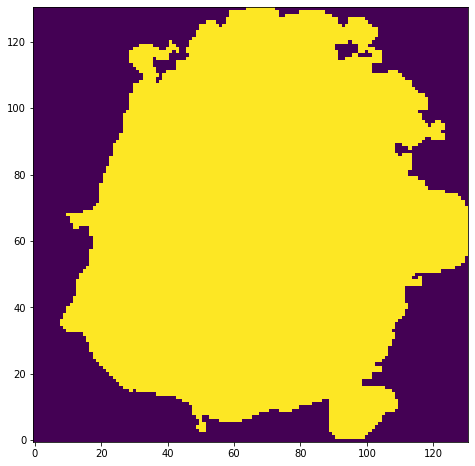

In [11]:
name_segmentation_maps = []
for ii in range(0,nbands):
    name_segmentation_maps.append(segm_map_name[int(ii)])

gal_region = redc_images.galaxy_region(name_segmentation_maps)

### plotting:
fig1 = plt.figure(figsize=(10,8))
f1 = plt.subplot()
plt.imshow(gal_region, origin='lower')

### Estimate E(B-V) of Galactic foreground dust attenuation
The Alambda_SDSS values are attenuation in SDSS bands obtained from the NED 
(http://ned.ipac.caltech.edu/cgi-bin/objsearch?search_type=Obj_id&objid=2369&objname=1&img_stamp=YES&hconst=73.0&omegam=0.27&omegav=0.73&corr_z=1) 

In [12]:
from piXedfit_images import EBV_foreground_dust

Alambda_SDSS = []
Alambda_SDSS.append(0.170)
Alambda_SDSS.append(0.132)
Alambda_SDSS.append(0.092)
Alambda_SDSS.append(0.068)
Alambda_SDSS.append(0.051)

Gal_EBV = EBV_foreground_dust(Alambda_SDSS)
print (Gal_EBV)

0.03394132817491654


### Run a function flux_map to calculate flux of every pixel within the galaxy's region of interest

In [14]:
out_fits_name = "fluxmap_califa_NGC309.fits"
flux_maps = redc_images.flux_map(output_stamps=output_stamps, gal_region=gal_region, Gal_EBV=Gal_EBV, 
                      gal_z=gal_z, out_fits_name=out_fits_name)

[Deriving maps of multiband fluxes and flux uncertainties]
[Calculating fluxes maps for galex_fuv]
[Calculating fluxes maps for galex_nuv]
[Calculating fluxes maps for sdss_u]
[Calculating fluxes maps for sdss_g]
[Calculating fluxes maps for sdss_r]
[Calculating fluxes maps for sdss_i]
[Calculating fluxes maps for sdss_z]
[Calculating fluxes maps for 2mass_j]
[Calculating fluxes maps for 2mass_h]
[Calculating fluxes maps for 2mass_k]
[Calculating fluxes maps for wise_w1]
[Calculating fluxes maps for wise_w2]
[scaling the flux map to a unit of 1.000000e-17 erg/s/cm^2/Ang.]


### Check the output FITS file containing pixel-wise multiband fluxes

In [15]:
hdu = fits.open("fluxmap_califa_NGC309.fits")
hdu.info()
header = hdu[0].header
print (header['unit'])
print (header)
gal_region = hdu['GALAXY_REGION'].data
flux_map = hdu['FLUX'].data
flux_err_map = hdu['FLUX_ERR'].data

Filename: fluxmap_califa_NGC309.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      22   ()      
  1  GALAXY_REGION    1 ImageHDU         8   (131, 131)   float64   
  2  FLUX          1 ImageHDU         9   (131, 131, 12)   float64   
  3  FLUX_ERR      1 ImageHDU         9   (131, 131, 12)   float64   
1e-17
SIMPLE  =                    T / conforms to FITS standard                      BITPIX  =                    8 / array data type                                NAXIS   =                    0 / number of array dimensions                     EXTEND  =                    T                                                  NFILTERS=                   12                                                  Z       =            0.0188977                                                  UNIT    =                1E-17                                                  BUNIT   = 'erg/s/cm^2/A'                                                   

### Plot maps of fluxes (unit: 1e-17erg/s/cm^2/A)

/asiaa/home/abdurrouf/.local/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log10
  if __name__ == '__main__':
/asiaa/home/abdurrouf/.local/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in log10
  if __name__ == '__main__':
DEBUG: matplotlib.colorbar(_get_ticker_locator_formatter): locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7fdff6045898>
DEBUG: matplotlib.colorbar(update_ticks): Using auto colorbar locator on colorbar
DEBUG: matplotlib.colorbar(update_ticks): locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7fdff6045898>
DEBUG: matplotlib.colorbar(_add_solids): Setting pcolormesh
DEBUG: matplotlib.colorbar(_get_ticker_locator_formatter): locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7fe01f7d1128>
DEBUG: matplotlib.colorbar(update_ticks): Using auto colorbar locator on colorbar
DEBUG: matplotlib.colorbar(update_ticks): locator: <matplotl

DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'STIXSizeOneSym' (STIXSizOneSymBol.ttf) normal normal bold normal>) = 10.335
DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'DejaVu Sans Display' (DejaVuSansDisplay.ttf) normal normal 400 normal>) = 10.05
DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'cmr10' (cmr10.ttf) normal normal 400 normal>) = 10.05
DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'cmtt10' (cmtt10.ttf) normal normal 400 normal>) = 10.05
DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'STIXGeneral' (STIXGeneral.ttf) normal normal regular normal>) = 10.05
DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'STIXGeneral' (STIXGeneralItalic.ttf) italic normal 400 normal>) = 11.05
DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'DejaVu Sans' (DejaVuSans-BoldOblique.ttf) oblique normal bold normal>) = 1.335
DE

DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'Simple CLM' (SimpleCLM-Medium.ttf) normal normal medium normal>) = 10.145
DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'Liberation Sans' (LiberationSans-Bold.ttf) normal normal bold normal>) = 10.335
DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'Frank Ruehl CLM' (FrankRuehlCLM-Bold.ttf) normal normal bold normal>) = 10.335
DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'Overpass' (Overpass-Bold-Italic.ttf) italic normal bold normal>) = 11.335
DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'Madan2' (madan.ttf) normal normal 400 normal>) = 10.05
DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'Simple CLM' (SimpleCLM-MediumOblique.ttf) oblique normal medium normal>) = 11.145
DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'FreeSerif' (FreeSerifBoldItalic.ttf) italic n

DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'Open Sans' (OpenSans-LightItalic.ttf) italic normal light normal>) = 11.24
DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'DejaVu Sans' (DejaVuSansCondensed-BoldOblique.ttf) oblique normal bold condensed>) = 1.535
DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'Liberation Serif' (LiberationSerif-Italic.ttf) italic normal 400 normal>) = 11.05
DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'Waree' (Waree-BoldOblique.ttf) oblique normal bold normal>) = 11.335
DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'Noto Emoji' (NotoEmoji-Regular.ttf) normal normal 400 normal>) = 10.05
DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'Open Sans' (OpenSans-BoldItalic.ttf) italic normal bold normal>) = 11.335
DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'Miriam Mono CLM' (MiriamMon

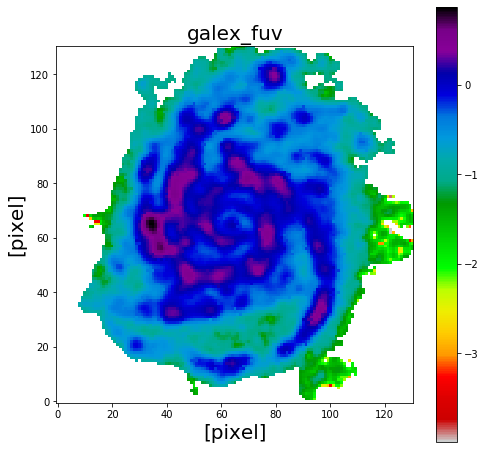

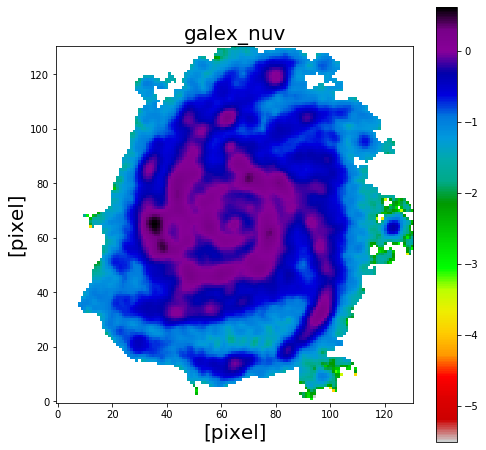

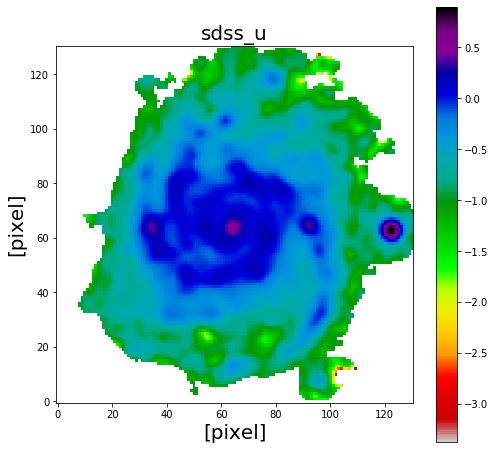

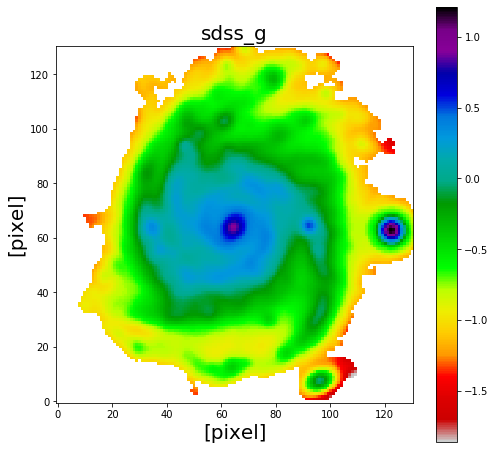

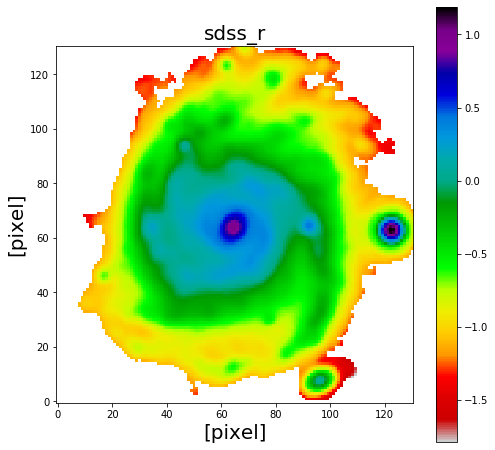

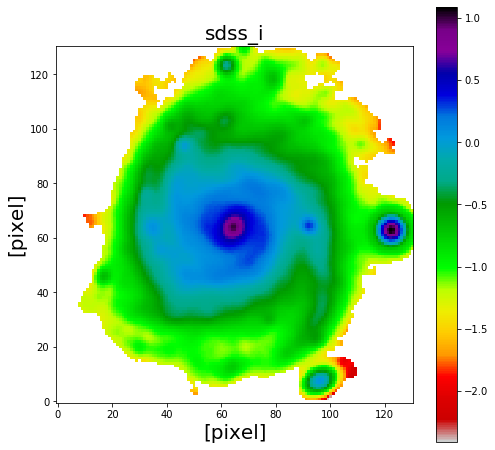

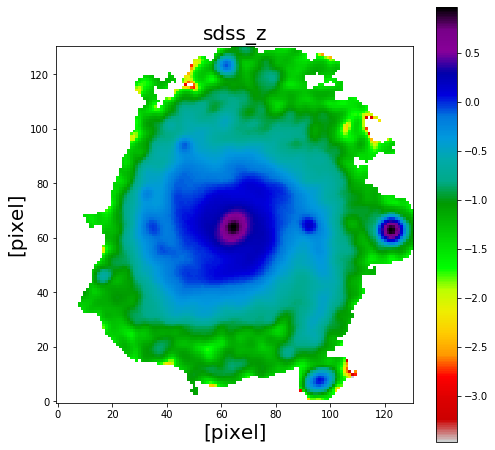

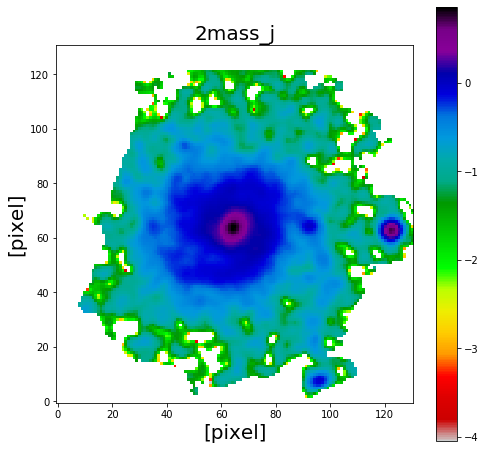

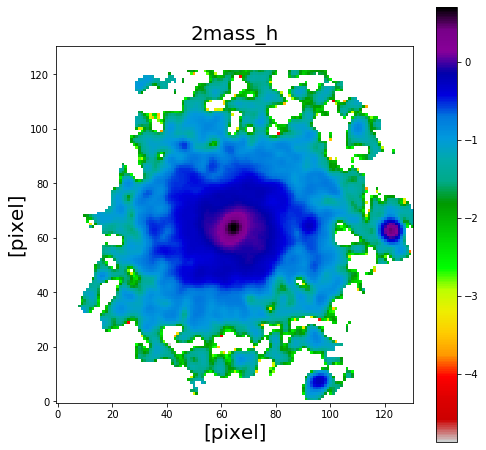

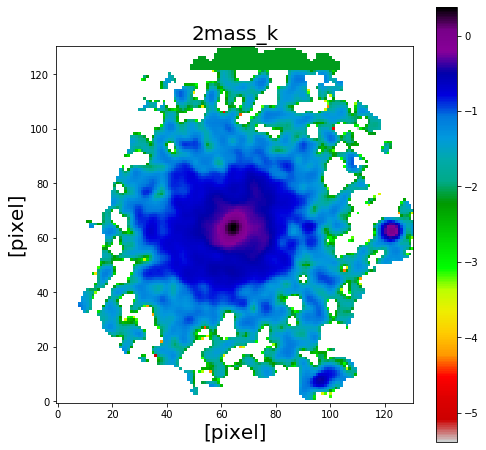

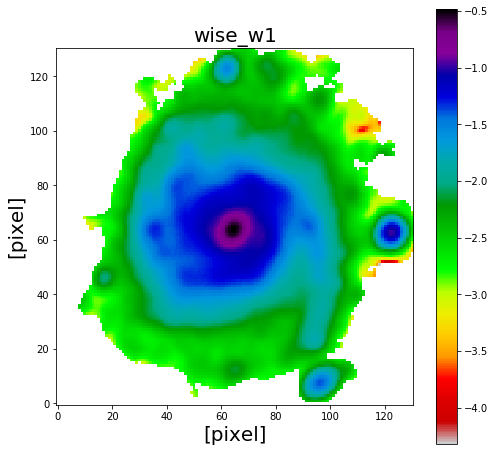

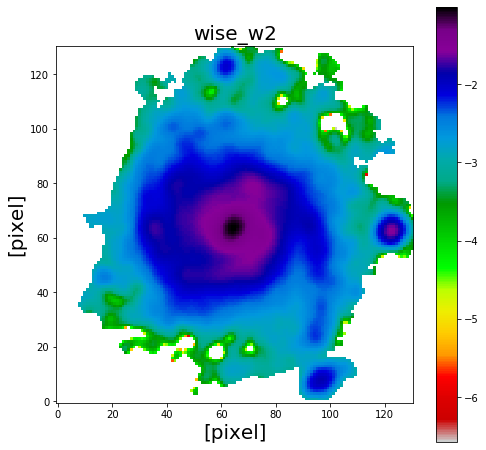

In [16]:
nbands = int(header['nfilters'])

for bb in range(0,nbands):
    fig1 = plt.figure(figsize=(8,8))
    f1 = plt.subplot()
    plt.title("%s" % filters[int(bb)], fontsize=20)
    plt.xlabel("[pixel]", fontsize=20)
    plt.ylabel("[pixel]", fontsize=20)
    plt.imshow(np.log10(flux_map[int(bb)]), origin='lower', cmap='nipy_spectral_r')
    plt.colorbar()

### Plot maps of flux uncertainties (unit: 1e-17erg/s/cm^2/A)

/asiaa/home/abdurrouf/.local/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log10
  if __name__ == '__main__':
DEBUG: matplotlib.colorbar(_get_ticker_locator_formatter): locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7fe01f92b320>
DEBUG: matplotlib.colorbar(update_ticks): Using auto colorbar locator on colorbar
DEBUG: matplotlib.colorbar(update_ticks): locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7fe01f92b320>
DEBUG: matplotlib.colorbar(_add_solids): Setting pcolormesh
DEBUG: matplotlib.colorbar(_get_ticker_locator_formatter): locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7fe01fa78940>
DEBUG: matplotlib.colorbar(update_ticks): Using auto colorbar locator on colorbar
DEBUG: matplotlib.colorbar(update_ticks): locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7fe01fa78940>
DEBUG: matplotlib.colorbar(_add_solids): Setting pcolormesh
DEBUG: matplotlib.colorbar(_get_ticker_loca

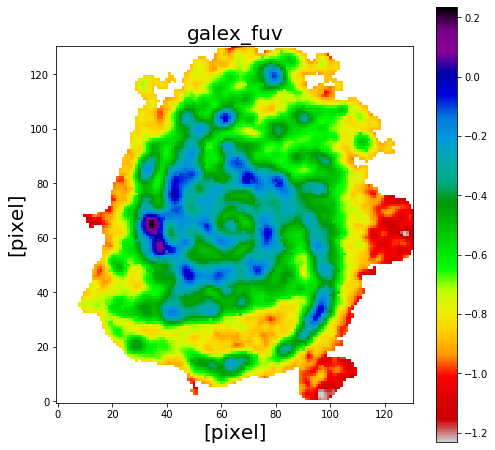

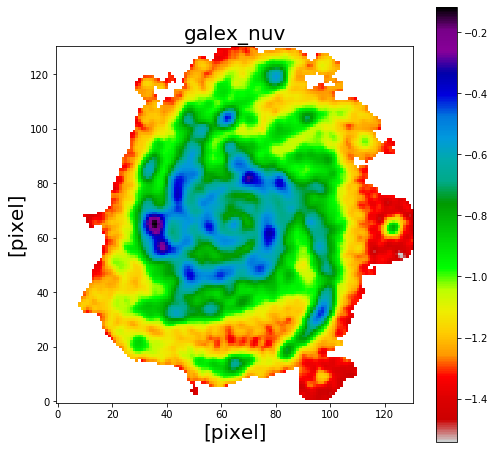

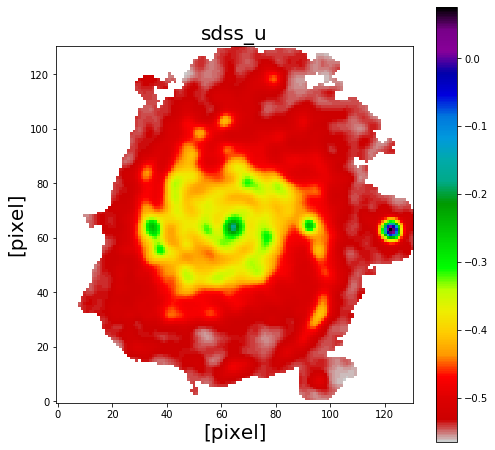

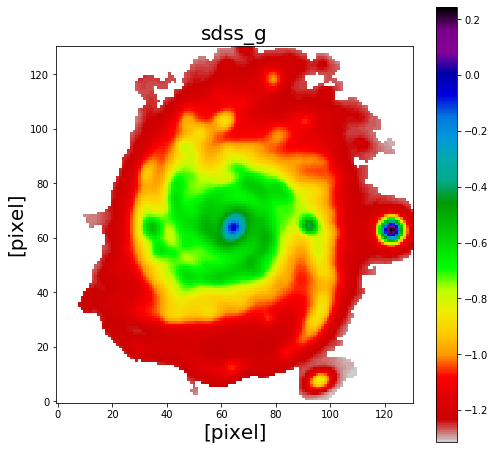

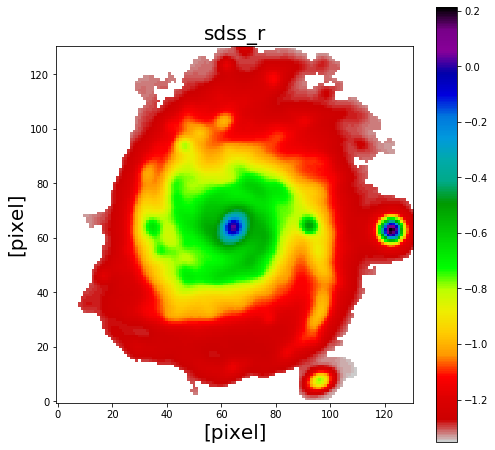

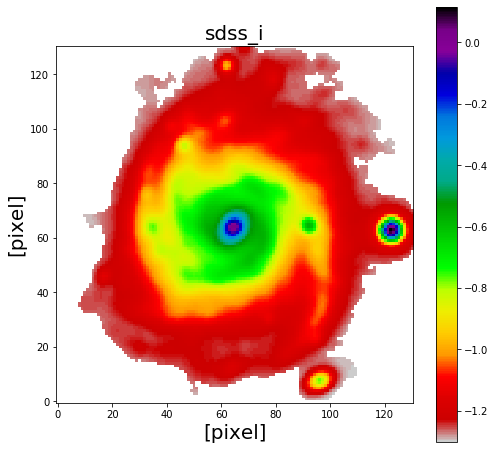

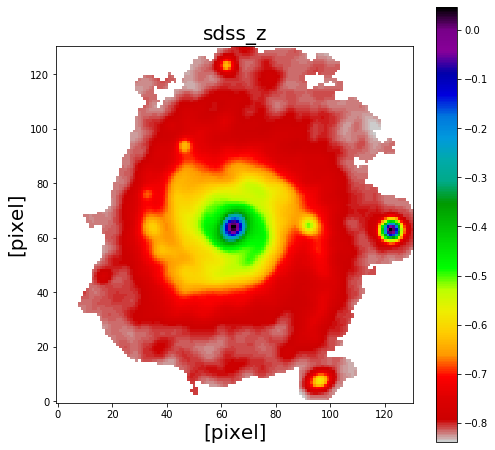

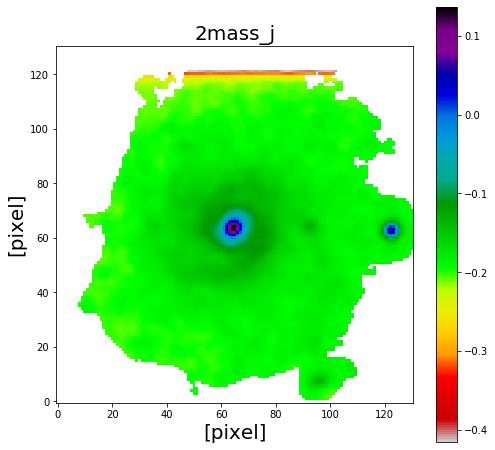

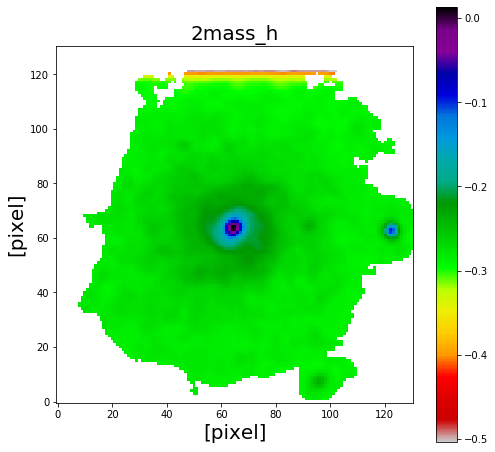

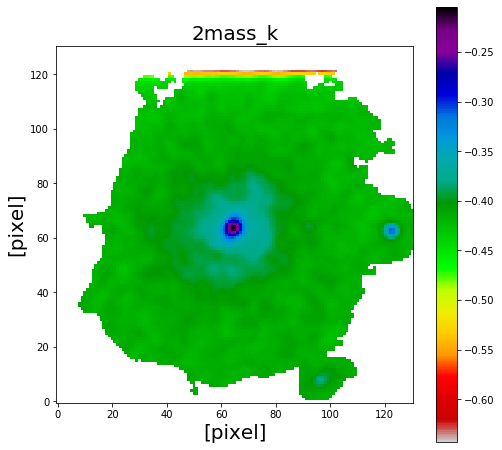

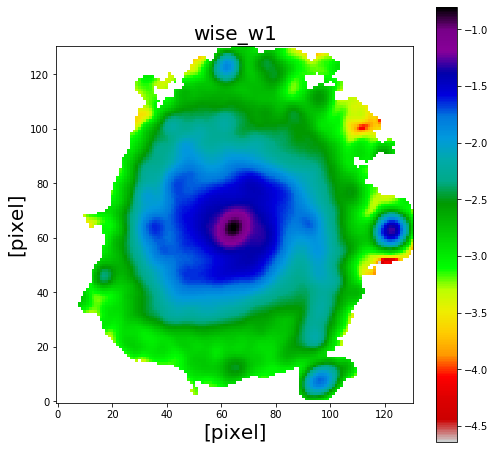

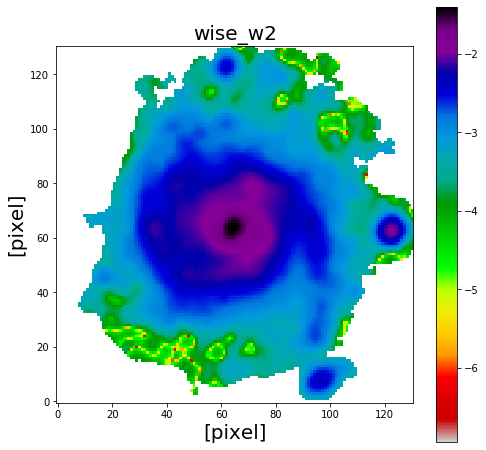

In [17]:
nbands = int(header['nfilters'])

for bb in range(0,nbands):
    fig1 = plt.figure(figsize=(8,8))
    f1 = plt.subplot()
    plt.title("%s" % filters[int(bb)], fontsize=20)
    plt.xlabel("[pixel]", fontsize=20)
    plt.ylabel("[pixel]", fontsize=20)
    plt.imshow(np.log10(flux_err_map[int(bb)]), origin='lower', cmap='nipy_spectral_r')
    plt.colorbar()

### Plot maps of S/N (in logarithmic scale)

/asiaa/home/abdurrouf/.local/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':
/asiaa/home/abdurrouf/.local/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in log10
  if __name__ == '__main__':
DEBUG: matplotlib.colorbar(_get_ticker_locator_formatter): locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7fe01ffe4f98>
DEBUG: matplotlib.colorbar(update_ticks): Using auto colorbar locator on colorbar
DEBUG: matplotlib.colorbar(update_ticks): locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7fe01ffe4f98>
DEBUG: matplotlib.colorbar(_add_solids): Setting pcolormesh
DEBUG: matplotlib.colorbar(_get_ticker_locator_formatter): locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7fdff57789b0>
DEBUG: matplotlib.colorbar(update_ticks): Using auto colorbar locator on colorbar
DEBUG: matplotlib.colorbar(update_ticks): locator: <mat

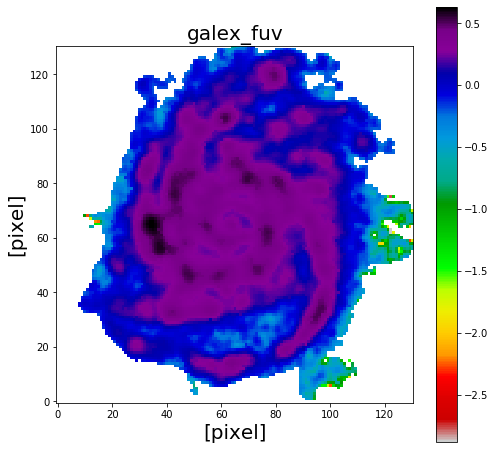

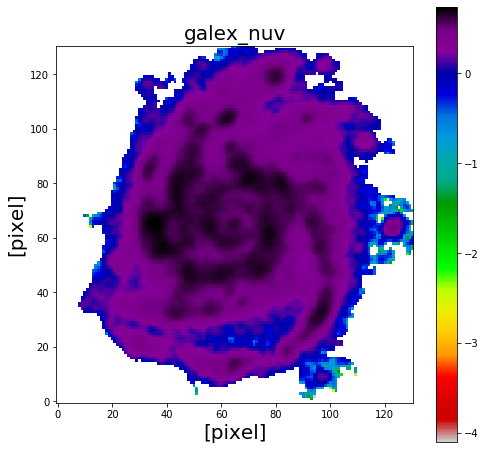

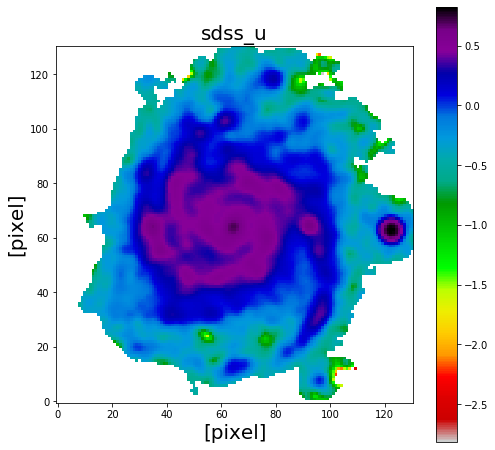

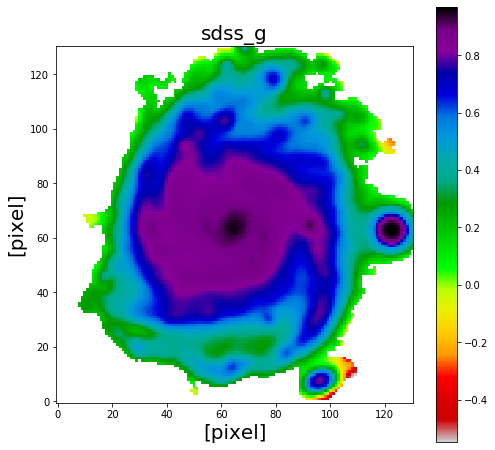

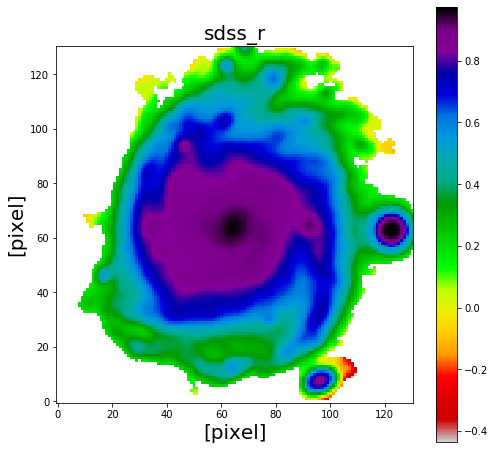

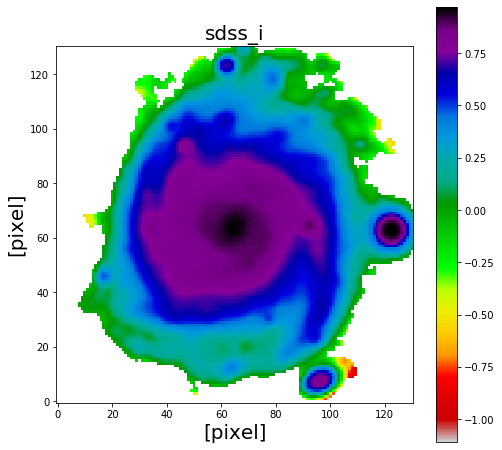

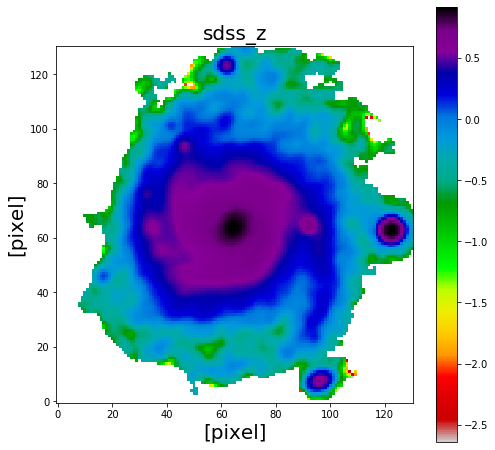

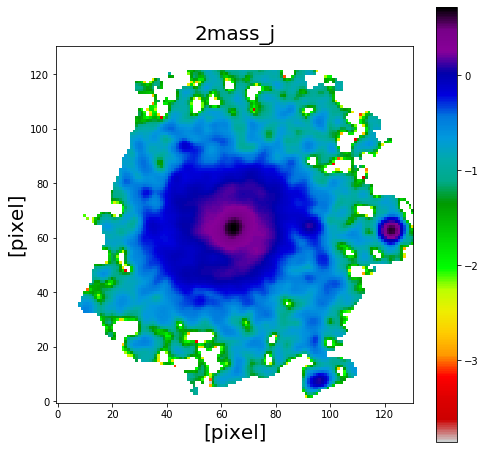

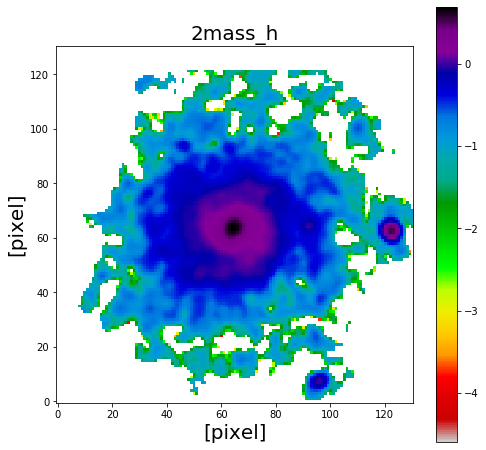

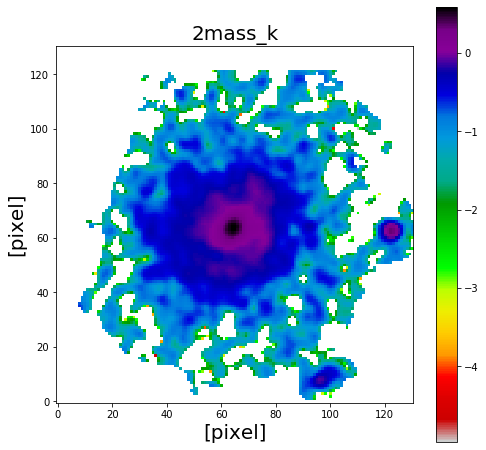

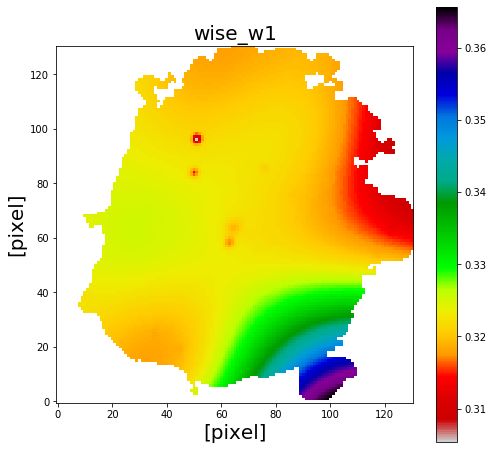

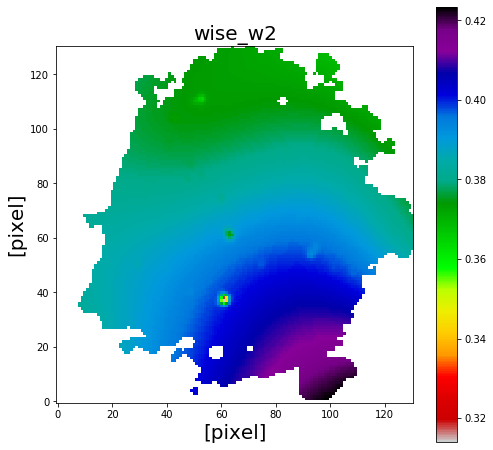

In [18]:
nbands = int(header['nfilters'])

for bb in range(0,nbands):
    fig1 = plt.figure(figsize=(8,8))
    f1 = plt.subplot()
    plt.title("%s" % filters[int(bb)], fontsize=20)
    plt.xlabel("[pixel]", fontsize=20)
    plt.ylabel("[pixel]", fontsize=20)
    plt.imshow(np.log10(flux_map[int(bb)]/flux_err_map[int(bb)]), origin='lower', cmap='nipy_spectral_r')
    plt.colorbar()